##======================================================##
##        File: electrochemical_plots.ipynb
##      Author: GOTTFRID OLSSON 
##     Created: 2024-04-24
##     Updated: 2024-06-13
##       About: Plots I-t and V-C data of cycled cells.
##======================================================##

In [10]:
# LIBRARIES #
%matplotlib inline
import matplotlib
import numpy as np
import CSV_handler as CSV
import plot_functions as f
import matplotlib.pyplot as plt
import matplotlib.ticker as plticker
#from mpl_toolkits.axes_grid1.inset_locator import inset_axes
#from mpl_toolkits.axes_grid1.inset_locator import mark_inset 


In [11]:
# PLOT SETTINGS #

fig_width_cm  = 16 #assumes A4-paper with margins=2.5cm on both right and left side
fig_height_cm = 9

font_size_axis   = 13
font_size_tick   = 11
font_size_legend = 9

grid_major = False
grid_minor = False
legend_on  = True

f.set_LaTeX_and_CMU(True) #must run before plotting
plt.rc('text.latex', preamble=r'\usepackage{siunitx}')

three_grayscale_colors = ['#000000', '#595959', '#B2B2B2'] # with 35%-point increase in "value" (in HSV) 
five_grayscale_colors  = ['#000000', '#333333', '#666666', '#999999', '#cccccc'] #with 30% saturation difference = good contrast
four_grayscale_colors  = ['#000000', '#3F3F3F', '#7F7F7F', '#BFBFBF'] # with 25%-point increase in "value" (in HSV) 
markers      = ['^',    'o',    's',   'X',     'D',   '.']
marker_sizes = [3.3,    3.3,    3.3,    3.6,    3,      3.3]

standard_text_box_settings = dict(boxstyle='round', facecolor='white', alpha=1.0, edgecolor=five_grayscale_colors[4]) #edgecolor, facecolor, alpha as to match legend 

DONE: set_LaTeX_and_CMU: True


In [12]:
# FUNCTIONS #

def shift_df_column_to_start_at_zero(df_column):
    df_column_shift_value = df_column[0]
    return df_column - df_column_shift_value

def try_get_column_from_df(df, column_name_string):
    try:
        column = df.loc[:,column_name_string]
    except:
        print("EXCEPTION: No column with name {column_name_string} (instead returns value None).")
        column = None
    return column

def get_t_V_I_error_from_Biologic_file_root_path(root_path, shift_t_to_zero=False):
    df = CSV.read(root_path, delimiter='\t') #tab separated from Biologic

    t = try_get_column_from_df(df, "time/s")
    if shift_t_to_zero:
        try:
            t = shift_df_column_to_start_at_zero(t)
        except:
            print("EXCEPTION: Could not perform shift_df_column_to_start_at_zero().")

    V = try_get_column_from_df(df, "Ewe/V")
    I = try_get_column_from_df(df, "I/mA")
    e = try_get_column_from_df(df, "error")

    return [t, V, I, e]
    
def calculate_deposited_amount_muAhcm2_from_t_I(t, I):
    # assumes data in units 'time/s' and 'current/mA' as well as an electrode area of 0.196 cm2 (Li, 5 mm diameter)
    A = 0.196       # cm2
    t_hour = t/3600 # h (hour)
    J = np.abs(I)/A # mA/cm2; abs to avoid negative capacity
    C = J*t_hour    # mAh/cm2
    C = C*1000      # muAh/cm2
    return C    

def get_current_date_and_time_as_ISO8601_string():
    import datetime
    date_and_time = datetime.datetime.now().strftime("%Y%m%dT%H%M%S")
    return date_and_time

def ansats_passivationCurrent_vs_time(x, a):
    # ansats is: y = a*x^b (y = current, x = time, a is a constant)
    return a/x


In [13]:
# Root paths #
data_root_path = "C:\\SUMMER-JOB-2024-MATERIALS-PHYSICS\\EXPERIMENTAL\\DATA\\Electrochemical-cycling\\"
S_series = "S-series\\"
electrochemical_figures_export_root_path = 'C:\\SUMMER-JOB-2024-MATERIALS-PHYSICS\\DATA-ANALYSIS\\electrochemical-plots\\'

In [14]:
# Paths for passivation data #

# each file has columns:  time/s	Ewe/V	I/mA	error
S01_Icell_t0012_C0500_20240614_passivation  = data_root_path + S_series + "2024-06-14_S01_Icell_t0012_C0500_J01_deltaX-110,1mm_02_MB_C06.txt"
S02_Icell_t0060_C0500_20240614_passivation  = data_root_path + S_series + "2024-06-14_S02_Icell_t0060_C0500_J01_deltaX-110,0mm_02_MB_C06.txt"
S03_Icell_t1800_C0500_20240614_passivation  = data_root_path + S_series + "2024-06-14_S03_Icell_t1800_C0500_J01_deltaX-110,0mm_02_MB_C04.txt"
S04_Icell_t0020_C0500_20240614_passivation  = data_root_path + S_series + "2024-06-14_S04_Icell_t0020_C0500_J01_deltaX-110,1mm_02_MB_C04.txt"
S05_TPcell_t1800_C0500_20240614_passivation = data_root_path + S_series + "2024-06-14_S05_TPcell_t1800_C0500_J01_only-2-electrodes_02_MB_C09.txt"

S01_t0012 = get_t_V_I_error_from_Biologic_file_root_path(S01_Icell_t0012_C0500_20240614_passivation,   shift_t_to_zero=True)
S02_t0060 = get_t_V_I_error_from_Biologic_file_root_path(S02_Icell_t0060_C0500_20240614_passivation,   shift_t_to_zero=True)
S03_t1800 = get_t_V_I_error_from_Biologic_file_root_path(S03_Icell_t1800_C0500_20240614_passivation,   shift_t_to_zero=True)
S04_t0020 = get_t_V_I_error_from_Biologic_file_root_path(S04_Icell_t0020_C0500_20240614_passivation,   shift_t_to_zero=True)
S05_t1800 = get_t_V_I_error_from_Biologic_file_root_path(S05_TPcell_t1800_C0500_20240614_passivation,  shift_t_to_zero=True)

'''
# these were built 2024-05-26 and have rested in a plastic bag (each) until 2024-06-11 when they were passivated and deposited onto
month_old_01_A5 = "C:\\SUMMER-JOB-2024-MATERIALS-PHYSICS\\EXPERIMENTAL\\DATA\\month-old_I-cell_passivation\\2024-06-11_Exploration-measurement-moth-old-I-cells\\" + "2024-06-11_month-old-I-cell_built-2024-05-16-old-OCV-2.2V_deltaX-110.0mm_02_MB_C04.txt"
month_old_02_A5 = "C:\\SUMMER-JOB-2024-MATERIALS-PHYSICS\\EXPERIMENTAL\\DATA\\month-old_I-cell_passivation\\2024-06-11_Exploration-measurement-moth-old-I-cells\\" + "2024-06-11_month-old-I-cell_built-2024-05-16-old-OCV-2.5V_deltaX-110.3mm_02_MB_C02.txt"
month_old_01 = get_t_V_I_error_from_Biologic_file_root_path(month_old_01_A5,  shift_t_to_zero=True)
month_old_02 = get_t_V_I_error_from_Biologic_file_root_path(month_old_02_A5,  shift_t_to_zero=True)
'''


# Paths for deposition data #

S01_Icell_t0012_C0500_20240614_deposition  = data_root_path + S_series + "2024-06-14_S01_Icell_t0012_C0500_J01_deltaX-110,1mm_04_CP_C06.txt"
S02_Icell_t0060_C0500_20240614_deposition  = data_root_path + S_series + "2024-06-14_S02_Icell_t0060_C0500_J01_deltaX-110,0mm_04_CP_C06.txt"
S03_Icell_t1800_C0500_20240614_deposition  = data_root_path + S_series + "2024-06-14_S03_Icell_t1800_C0500_J01_deltaX-110,0mm_04_CP_C04.txt"
S04_Icell_t0020_C0500_20240614_deposition  = data_root_path + S_series + "2024-06-14_S04_Icell_t0020_C0500_J01_deltaX-110,1mm_04_CP_C04.txt"
S05_TPcell_t1800_C0500_20240614_deposition = data_root_path + S_series + "2024-06-14_S05_TPcell_t1800_C0500_J01_only-2-electrodes_04_CP_C09.txt"

S01_C0500 = get_t_V_I_error_from_Biologic_file_root_path(S01_Icell_t0012_C0500_20240614_deposition,   shift_t_to_zero=True)
S02_C0500 = get_t_V_I_error_from_Biologic_file_root_path(S02_Icell_t0060_C0500_20240614_deposition,   shift_t_to_zero=True)
S03_C0500 = get_t_V_I_error_from_Biologic_file_root_path(S03_Icell_t1800_C0500_20240614_deposition,   shift_t_to_zero=True)
S04_C0500 = get_t_V_I_error_from_Biologic_file_root_path(S04_Icell_t0020_C0500_20240614_deposition,   shift_t_to_zero=True)
S05_C0500 = get_t_V_I_error_from_Biologic_file_root_path(S05_TPcell_t1800_C0500_20240614_deposition,  shift_t_to_zero=True)

S01_C0500_capacity = calculate_deposited_amount_muAhcm2_from_t_I(S01_C0500[0], S01_C0500[2])   #muAh/cm2
S02_C0500_capacity = calculate_deposited_amount_muAhcm2_from_t_I(S02_C0500[0], S02_C0500[2])   #muAh/cm2
S03_C0500_capacity = calculate_deposited_amount_muAhcm2_from_t_I(S03_C0500[0], S03_C0500[2])   #muAh/cm2
S04_C0500_capacity = calculate_deposited_amount_muAhcm2_from_t_I(S04_C0500[0], S04_C0500[2])   #muAh/cm2
S05_C0500_capacity = calculate_deposited_amount_muAhcm2_from_t_I(S05_C0500[0], S05_C0500[2])   #muAh/cm2

DONE: Reading CSV: C:\SUMMER-JOB-2024-MATERIALS-PHYSICS\EXPERIMENTAL\DATA\Electrochemical-cycling\S-series\2024-06-14_S01_Icell_t0012_C0500_J01_deltaX-110,1mm_02_MB_C06.txt
DONE: Reading CSV: C:\SUMMER-JOB-2024-MATERIALS-PHYSICS\EXPERIMENTAL\DATA\Electrochemical-cycling\S-series\2024-06-14_S02_Icell_t0060_C0500_J01_deltaX-110,0mm_02_MB_C06.txt
DONE: Reading CSV: C:\SUMMER-JOB-2024-MATERIALS-PHYSICS\EXPERIMENTAL\DATA\Electrochemical-cycling\S-series\2024-06-14_S03_Icell_t1800_C0500_J01_deltaX-110,0mm_02_MB_C04.txt
DONE: Reading CSV: C:\SUMMER-JOB-2024-MATERIALS-PHYSICS\EXPERIMENTAL\DATA\Electrochemical-cycling\S-series\2024-06-14_S04_Icell_t0020_C0500_J01_deltaX-110,1mm_02_MB_C04.txt
DONE: Reading CSV: C:\SUMMER-JOB-2024-MATERIALS-PHYSICS\EXPERIMENTAL\DATA\Electrochemical-cycling\S-series\2024-06-14_S05_TPcell_t1800_C0500_J01_only-2-electrodes_02_MB_C09.txt
DONE: Reading CSV: C:\SUMMER-JOB-2024-MATERIALS-PHYSICS\EXPERIMENTAL\DATA\Electrochemical-cycling\S-series\2024-06-14_S01_Icell_t00

In [15]:
'''
x_data_to_fit = month_old_02[0][1:-1]/60 # /60 to go from second to minute
y_data_to_fit = np.abs(month_old_02[2][1:-1]*1000) #*1000 to go from mA to muA

fitted_parameters, _ = curve_fit(ansats_passivationCurrent_vs_time, x_data_to_fit, y_data_to_fit)
print(fitted_parameters)
'''

'\nx_data_to_fit = month_old_02[0][1:-1]/60 # /60 to go from second to minute\ny_data_to_fit = np.abs(month_old_02[2][1:-1]*1000) #*1000 to go from mA to muA\n\nfitted_parameters, _ = curve_fit(ansats_passivationCurrent_vs_time, x_data_to_fit, y_data_to_fit)\nprint(fitted_parameters)\n'

DONE: set_font_size: (axis, tick, legend): 13, 11, 9
DONE: set_axis_scale: X: log, Y: log on axs: None
DONE: set_axis_labels: on axs: None
DONE: set_axis_invert: x: False, y: False on axs: None
DONE: set_legend: (on, alpha, location): True, 1.0, best, on axs: None
DONE: align_labels
DONE: set_layout_tight


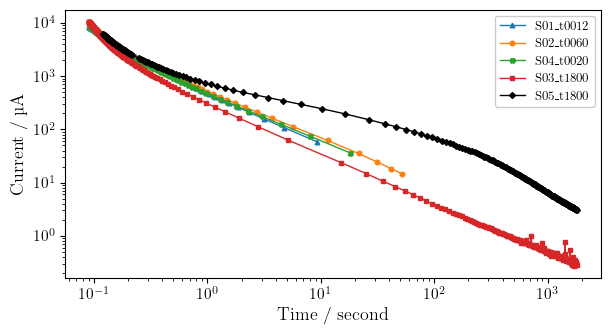

In [16]:
# PLOT PASSIVATION: I vs. t #
# Create figure on which axis lives, one axis per subplot
fig, axs = plt.subplots(nrows=1, ncols=1, figsize=(fig_width_cm/2.54, fig_height_cm/2.54), sharex=False, sharey=False)

current_multiplier = 1000 # mA-->muA in plot
time_divider = 1 # s --> s #minute in plot
# Plot data (axs.plot, .errorbar, .hist, ...) # SEIDEP_sigma_x_MB = [t, V, I, error]
axs.plot(S01_t0012[0][1:-1]/time_divider, np.abs(S01_t0012[2][1:-1]*current_multiplier), linewidth=1, linestyle='-', label='S01_t0012', marker=markers[0], markersize=marker_sizes[0])#, color=five_grayscale_colors[0])#, marker=markers[-1], markersize=marker_sizes[-1])#, label='$\\sigma=0.05$')
axs.plot(S02_t0060[0][1:-1]/time_divider, np.abs(S02_t0060[2][1:-1]*current_multiplier), linewidth=1, linestyle='-', label='S02_t0060', marker=markers[1], markersize=marker_sizes[1])#, color=five_grayscale_colors[1])#, marker=markers[-1], markersize=marker_sizes[-1])#, label='$\\sigma=0.05$')
axs.plot(S04_t0020[0][1:-1]/time_divider, np.abs(S04_t0020[2][1:-1]*current_multiplier), linewidth=1, linestyle='-', label='S04_t0020', marker=markers[3], markersize=marker_sizes[3])#, color=five_grayscale_colors[3])#, marker=markers[-1], markersize=marker_sizes[-1])#, label='$\\sigma=0.05$')
axs.plot(S03_t1800[0][1:-1]/time_divider, np.abs(S03_t1800[2][1:-1]*current_multiplier), linewidth=1, linestyle='-', label='S03_t1800', marker=markers[2], markersize=marker_sizes[2])#, color=five_grayscale_colors[2])#, marker=markers[-1], markersize=marker_sizes[-1])#, label='$\\sigma=0.05$')
axs.plot(S05_t1800[0][1:-1]/time_divider, np.abs(S05_t1800[2][1:-1]*current_multiplier), linewidth=1, linestyle='-', label='S05_t1800', marker=markers[4], markersize=marker_sizes[4], color='k')#, color=five_grayscale_colors[0])#, marker=markers[-1], markersize=marker_sizes[-1])#, label='$\\sigma=0.05$')
#axs.plot(month_old_01[0][1:-1]/time_divider,np.abs(month_old_01[2][1:-1]*current_multiplier), linewidth=1, linestyle='-', label='old-01',  marker='v', markersize=3)#, color=five_grayscale_colors[0])#, marker=markers[-1], markersize=marker_sizes[-1])#, label='$\\sigma=0.05$')
#axs.plot(month_old_02[0][1:-1]/time_divider,np.abs(month_old_02[2][1:-1]*current_multiplier), linewidth=1, linestyle='-', label='old-02',  marker='*', markersize=4)#, color=five_grayscale_colors[0])#, marker=markers[-1], markersize=marker_sizes[-1])#, label='$\\sigma=0.05$')

'''
x_linspace = np.linspace(0.1/60, 10000/60)
y_fit = ansats_passivationCurrent_vs_time(x_linspace, 30)#, fitted_parameters[1])
axs.plot(x_linspace, y_fit, linewidth=4, linestyle=':', label='fit', color='k')
print(f"Fit: y=a/x, where a={fitted_parameters[0]}")#, b={fitted_parameters[1]}")
'''

# Settings for each axis (axs)
f.set_font_size(axis=font_size_axis, tick=font_size_tick, legend=font_size_legend)
f.set_axis_scale(   axs, xScale_string='log', yScale_string='log')
f.set_axis_labels(  axs, x_label='Time / second', y_label='Current / \\textmu A')
f.set_axis_invert(  axs, x_invert=False, y_invert=False)
#f.set_axis_limits(  axs, xmin=0.06, xmax=3*10000, ymin=1*0.1, ymax=3*10000)
#f.set_grid(         axs, grid_major_on=grid_major, grid_major_linewidth=0.7, grid_minor_on=grid_minor, grid_minor_linewidth=0.3) # set_grid must be after set_axis_scale for some reason (at least with 'log')
f.set_legend(       axs, legend_on=legend_on, alpha=1.0, location='best')
f.align_labels(fig)
f.set_layout_tight(fig)

#PDF_path_passivation = electrochemical_figures_export_root_path + "Passivation_S01-2-3-4-5_" + get_current_date_and_time_as_ISO8601_string() + '.pdf'
#f.export_figure_as_pdf(PDF_path_passivation)
plt.show()

DONE: set_font_size: (axis, tick, legend): 13, 11, 9
DONE: set_axis_scale: X: linear, Y: linear on axs: None
DONE: set_axis_labels: on axs: None
DONE: set_axis_invert: x: False, y: False on axs: None
DONE: set_axis_limits: x=(-0.05, 10) and y=(-0.2, 1e-10) on axs: None
DONE: set_grid: grid_major: False, grid_minor: False on axs: None
DONE: set_legend: (on, alpha, location): True, 1.0, best, on axs: None
DONE: align_labels
DONE: set_layout_tight


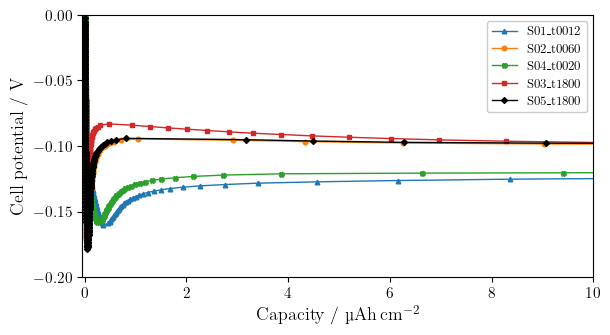

In [19]:
# PLOT SEIDEP: V vs. C #

# Create figure on which axis lives, one axis per subplot
fig, axs = plt.subplots(nrows=1, ncols=1, figsize=(fig_width_cm/2.54, fig_height_cm/2.54), sharex=False, sharey=False)

# Plot your data (axs.plot, .errorbar, .hist, ...) # SEIDEP_sigma_x_MB = [t, V, I, error]
axs.plot(S01_C0500_capacity, S01_C0500[1], linewidth=1, linestyle='-', marker=markers[0], markersize=marker_sizes[0], label="S01_t0012") #color=five_grayscale_colors[0], 
axs.plot(S02_C0500_capacity, S02_C0500[1], linewidth=1, linestyle='-', marker=markers[1], markersize=marker_sizes[1], label="S02_t0060") #color=five_grayscale_colors[1], 
axs.plot(S04_C0500_capacity, S04_C0500[1], linewidth=1, linestyle='-', marker=markers[3], markersize=marker_sizes[3], label="S04_t0020") #color=five_grayscale_colors[3], 
axs.plot(S03_C0500_capacity, S03_C0500[1], linewidth=1, linestyle='-', marker=markers[2], markersize=marker_sizes[2], label="S03_t1800") #color=five_grayscale_colors[2], 
axs.plot(S05_C0500_capacity, S05_C0500[1], linewidth=1, linestyle='-', marker=markers[4], markersize=marker_sizes[4], label="S05_t1800", color='k') #color=five_grayscale_colors[4], 

# Settings for each axis (axs)
f.set_font_size(axis=font_size_axis, tick=font_size_tick, legend=font_size_legend)
f.set_axis_scale(   axs, xScale_string='linear', yScale_string='linear')
f.set_axis_labels(  axs, x_label='Capacity / \\textmu Ah\\,cm$^{-2}$', y_label='Cell potential / V')
f.set_axis_invert(  axs, x_invert=False, y_invert=False)
f.set_axis_limits(  axs, xmin=-0.05, xmax=10, ymin=-0.20, ymax=0.0000000001)  # xmax=50.05, ymin=-0.21, ymax=0.01) 
f.set_grid(         axs, grid_major_on=grid_major, grid_major_linewidth=0.7, grid_minor_on=grid_minor, grid_minor_linewidth=0.3) # set_grid must be after set_axis_scale for some reason (at least with 'log')
f.set_legend(       axs, legend_on=legend_on, alpha=1.0, location='best')
f.align_labels(fig)
f.set_layout_tight(fig)

#PDF_path_deposition = electrochemical_figures_export_root_path + 'Deposition_higher-C_S01-2-3-4_' + get_current_date_and_time_as_ISO8601_string() + '.pdf'
#f.export_figure_as_pdf(PDF_path_deposition)
plt.show()